# Pymkm demo: CO2 hydrogenation to MeOH over Pd-In2O3 catalyst

## MKM class import, object instance and attributes overview

In [2]:
import os, sys
sys.path.insert(0, "../") 
from mkm import MKM

To create an instance of the MKM class, three parameters must be provided: <br>
1) a name for the catalytic system under study. <br>
2) the path to the rm.mkm file containing the reaction mechanism. <br>
3) the path to the g.mkm file containing the reaction energy profile. <br>
4) a list of inert species in case these are present in the system (optional). <br>
5) the temperature at which the entropic contributions have been computed (optional). <br>

In [3]:
model = MKM('Pd-In2O3',
            'rm.mkm', 
            'g.mkm', 
            inerts=[], 
            t_ref=553, 
            reactor='differential')

# Model exploration
To investigate the characteristics of the system under study, several attributes can be easily inspected to check general information like number of elementary reactions, energetics, reaction network, etc.

In [5]:
print(model)

System: Pd-In2O3

CO2 + 3H2 -> CH3OH + H2O
CO2 + H2 -> CO + H2O

Number of global reactions: 2
Number of elementary reactions: 20
Number of surface species: 17
Number of gas species: 5



In [6]:
model.df_gibbs

,,$\Delta$G_reaction / eV,$\Delta$G_barrier / eV,"$\Delta$G_barrier,reverse / eV"
R1,ads,9.000000e-02,0.09,0.000000e+00
R2,ads,3.600000e-01,0.36,0.000000e+00
R3,ads,2.700000e-01,0.27,0.000000e+00
R4,ads,-3.685940e-14,0.00,3.685940e-14
R5,sur,-3.500000e-01,0.92,1.270000e+00
R6,ads,-4.100000e-01,0.00,4.100000e-01
R7,sur,7.800000e-01,1.55,7.700000e-01
R8,sur,1.000000e-01,0.10,0.000000e+00
R9,sur,1.800000e+00,1.80,0.000000e+00
R10,sur,-9.200000e-01,0.00,9.200000e-01


## Thermodynamic consistency analysis

A often overlooked aspect in microkinetic models is its thermodynamic consistency: although we are dealing with catalysis, a kinetic phenomenon, it is strictly bound to thermodynamic constraints. Currently, pymkm allows a quantitative estimation of thermodynamic consistency of microkinetic models: this is done comparing directly the equilibrium constants of the global reaction we are studying with the global constants built from the elementary reactions proposed in the reaction network. This can be easily done using the MKM.thermodynamic_consistency() method, that needs as input only the temperature at which we want to perform the analysis.

In [7]:
model.thermochemistry(553)

Pd-In2O3: Thermochemistry
Temperature: 553K

---------------------------------------------------------------------
CO2 + 3H2 -> CH3OH + H2O
Model:    DHR=-1.18e+02 kJ/mol    DSR=-2.77e-01 kJ/mol/K     DGR=1.47e+04 kJ/mol
Database: DHR=-6.39e+01 kJ/mol    DSR=-2.04e-01 kJ/mol/K     DGR=4.87e+01 kJ/mol
---------------------------------------------------------------------

CO2 + H2 -> CO + H2O
Model:    DHR=6.85e+01 kJ/mol    DSR=1.92e-02 kJ/mol/K     DGR=-9.56e+02 kJ/mol
Database: DHR=3.93e+01 kJ/mol    DSR=3.74e-02 kJ/mol/K     DGR=1.87e+01 kJ/mol
---------------------------------------------------------------------



In [9]:
model.thermodynamic_consistency(553)

 Pd-In2O3: Thermodynamic consistency analysis
 Temperature = 553K

----------------------------------------------------------------------------------
CO2 + 3H2 -> CH3OH + H2O
Model:    keqH=1.31e+11    keqS=3.23e-15    Keq=4.25e-04
Database: keqH=1.09e+06    keqS=2.33e-11    Keq=2.53e-05
----------------------------------------------------------------------------------

CO2 + H2 -> CO + H2O
Model:    keqH=3.38e-07    keqS=1.01e+01    Keq=3.40e-06
Database: keqH=1.93e-04    keqS=8.99e+01    Keq=1.73e-02
----------------------------------------------------------------------------------



It is easy to observe from the generated report that the model is not thermodynamically consistent, both at enthalpic and entropic level, as the equilibrium constants of the global reactions calculated with DFT are order of magnitude different from the values extracted from the thermochemistry database. However, considering the MeOH reaction, observing the equilibrium constant one could think the gap is not so huge: this is due to the fact that enthalpy and entropy constants compensate each pther in the opposite direction, "canceling" the discrepancy between database and DFT-derived equilibrium constants.

## Step 2: microkinetic model single run

In [12]:
exp = model.single_run(550, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 550K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 5.31e-02 1/s
MeOH Selectivity: 91.18%
Most Abundant Surface Intermediate: i21 Coverage: 88.14% 
CPU time: 1.78 s


In [14]:
exp.keys()

dict_keys(['T', 'P', 'y_in', 'theta', 'ddt', 'r', 'r_MeOH', 'r_RWGS', 'S_MeOH', 'MASI', 'solver'])

In [17]:
exp['MASI']

{'i21': 88.14423948310454}

## Step 3: Apparent activation energy

Pd-In2O3: Apparent activation energy for MeOH reaction

Temperature range: 523-553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

Temperature = 523K    CPU Time: 1.73s
Temperature = 543K    CPU Time: 1.73s
Temperature = 563K    CPU Time: 1.87s


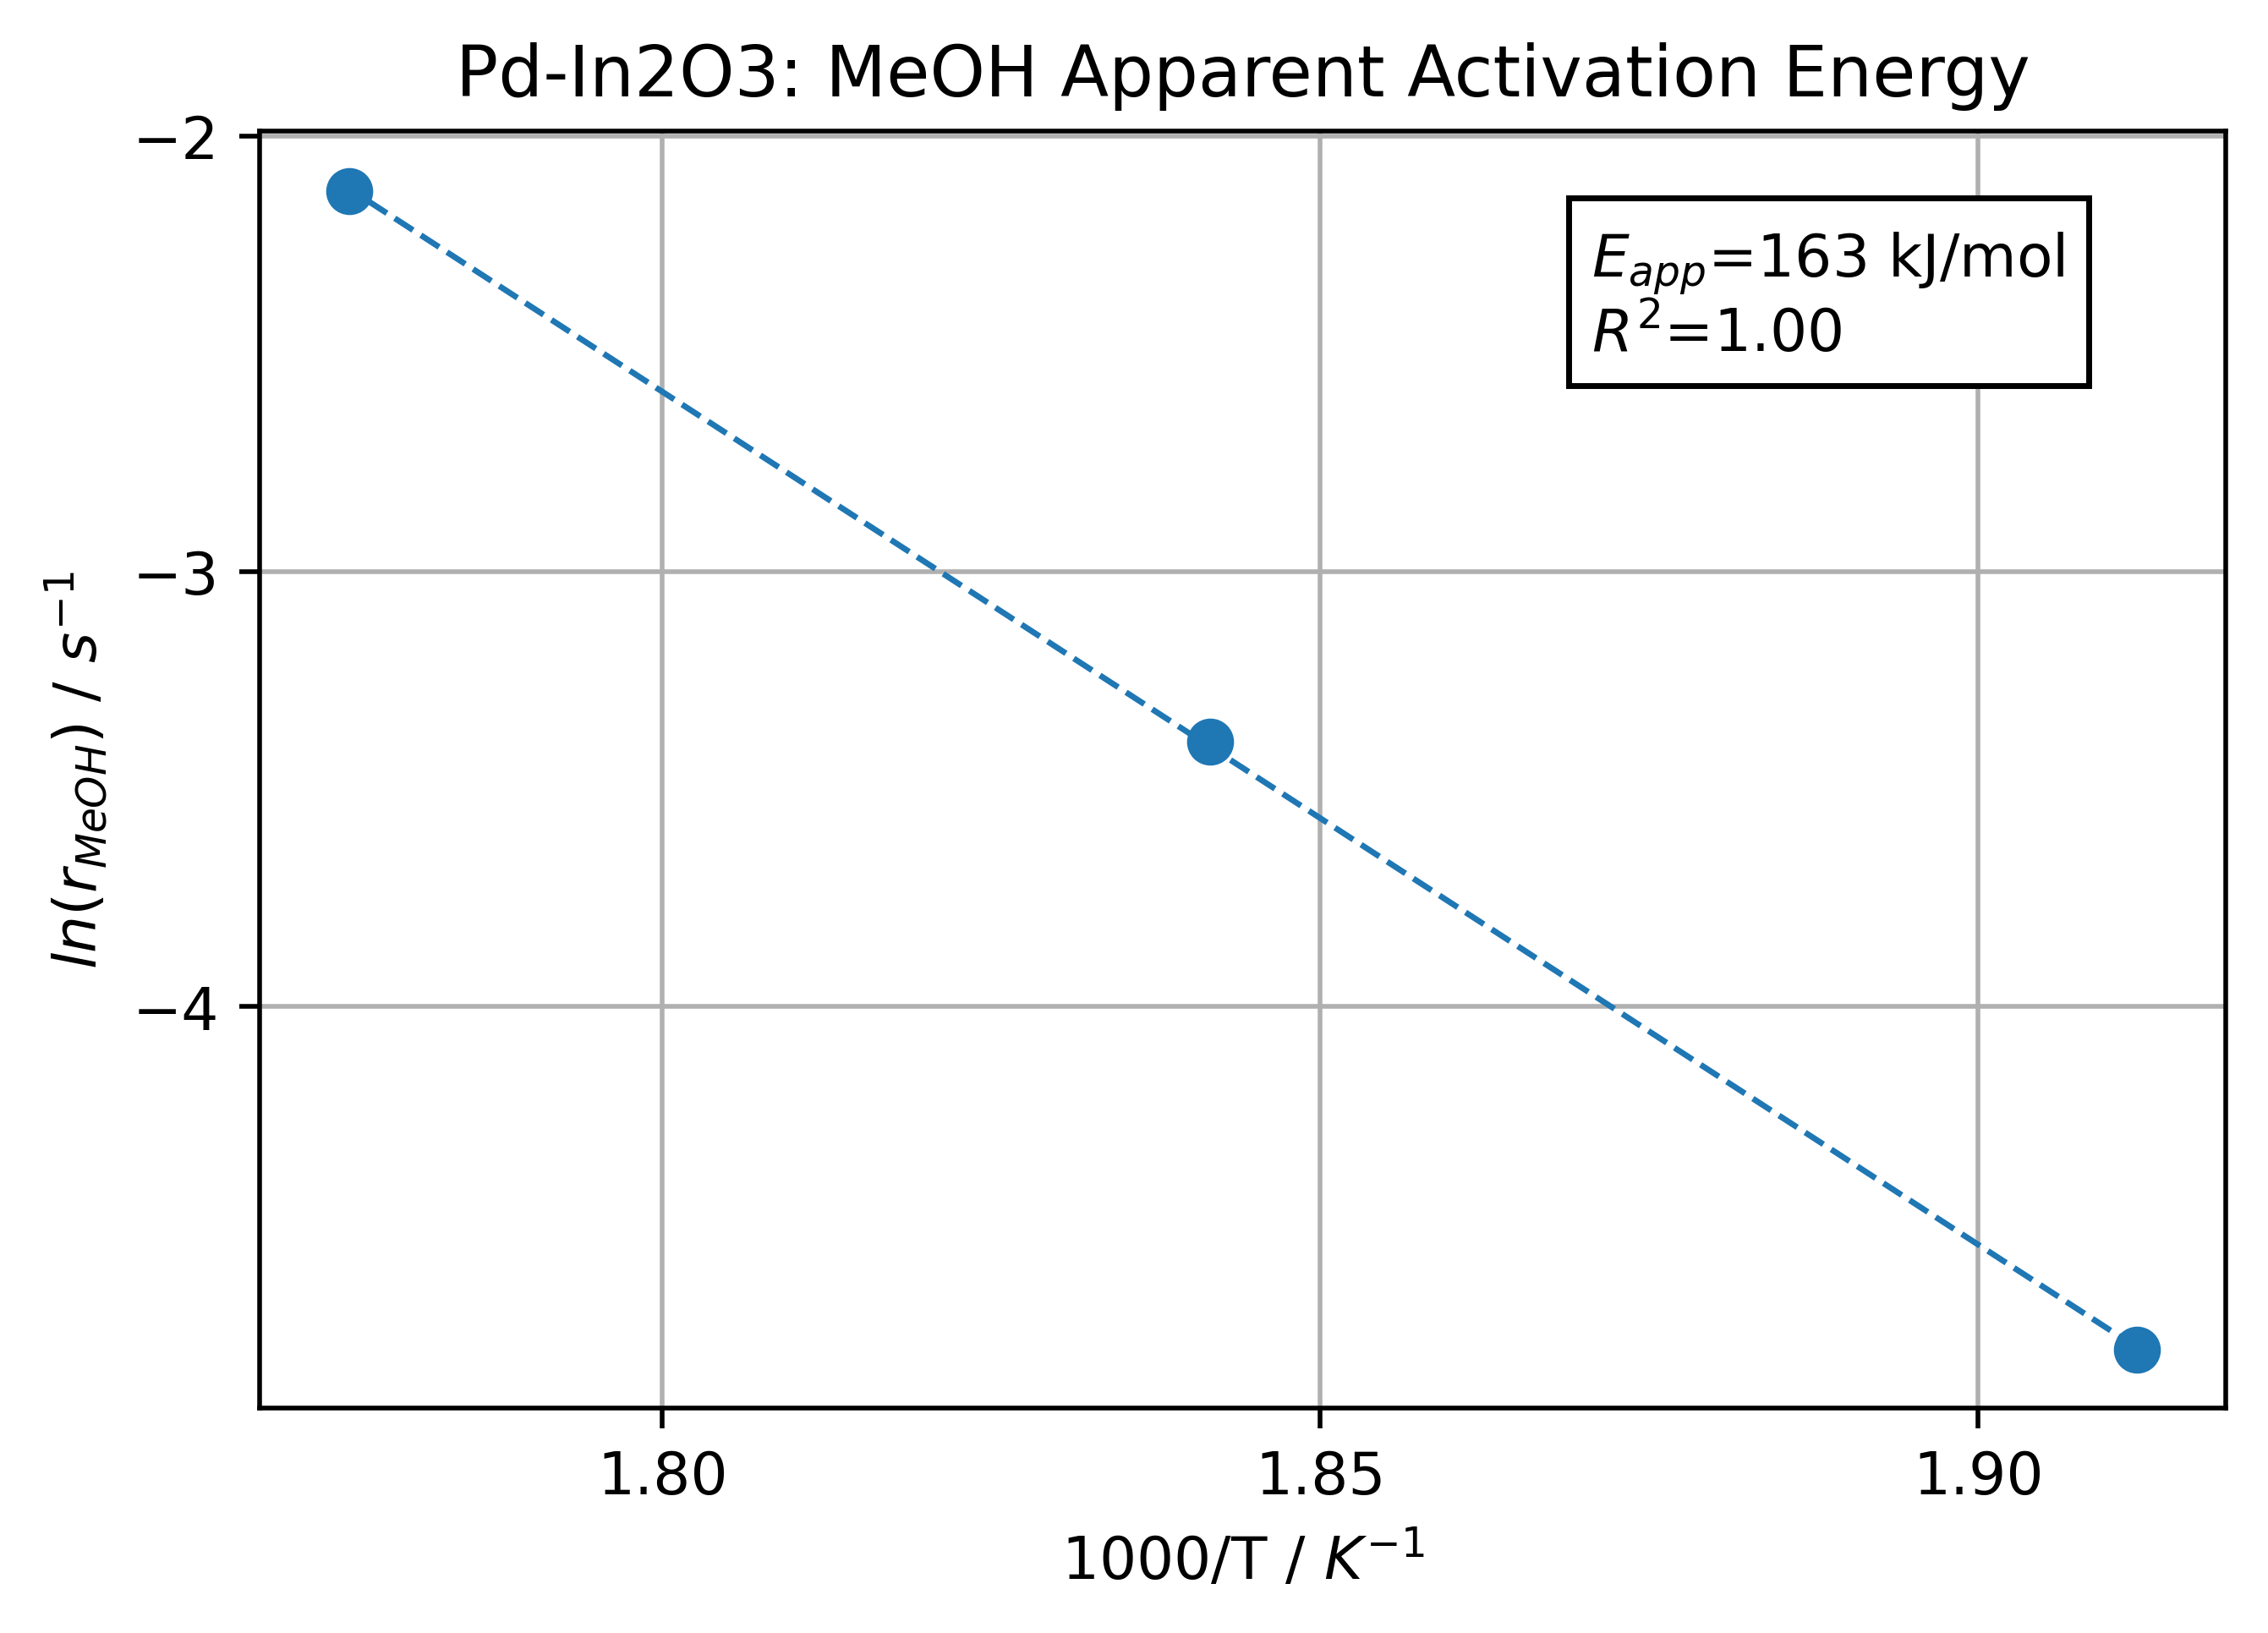

In [20]:
Eapp = model.calc_apparent_activation_energy([523,573,20], 5e6, [0.8,0.2,0,0,0], 'MeOH')

In [25]:
print(Eapp)

{'Tmin': 533, 'Tmax': 613, 'N': 5, 'P': 50.0, 'y_gas': {'H2(g)': 0.8, 'CO2(g)': 0.2, 'H2O(g)': 0, 'CH3OH(g)': 0, 'CO(g)': 0}, 'Eapp_MeOH': 150.29059266781312, 'R2': 0.9999796830922202}


## Step 4: Apparent reaction orders

In [21]:
import numpy as np
composition_matrix = np.array([[0.78,0.22,0,0,0],[0.8,0.2,0,0,0],[0.82,0.18,0,0,0]])

Pd-In2O3: CO2 Apparent reaction order for MeOH reaction

Temperature = 573K    Pressure = 50.0bar

y_CO2 = 0.22    CPU Time: 1.87s
y_CO2 = 0.20    CPU Time: 1.84s
y_CO2 = 0.18    CPU Time: 1.97s


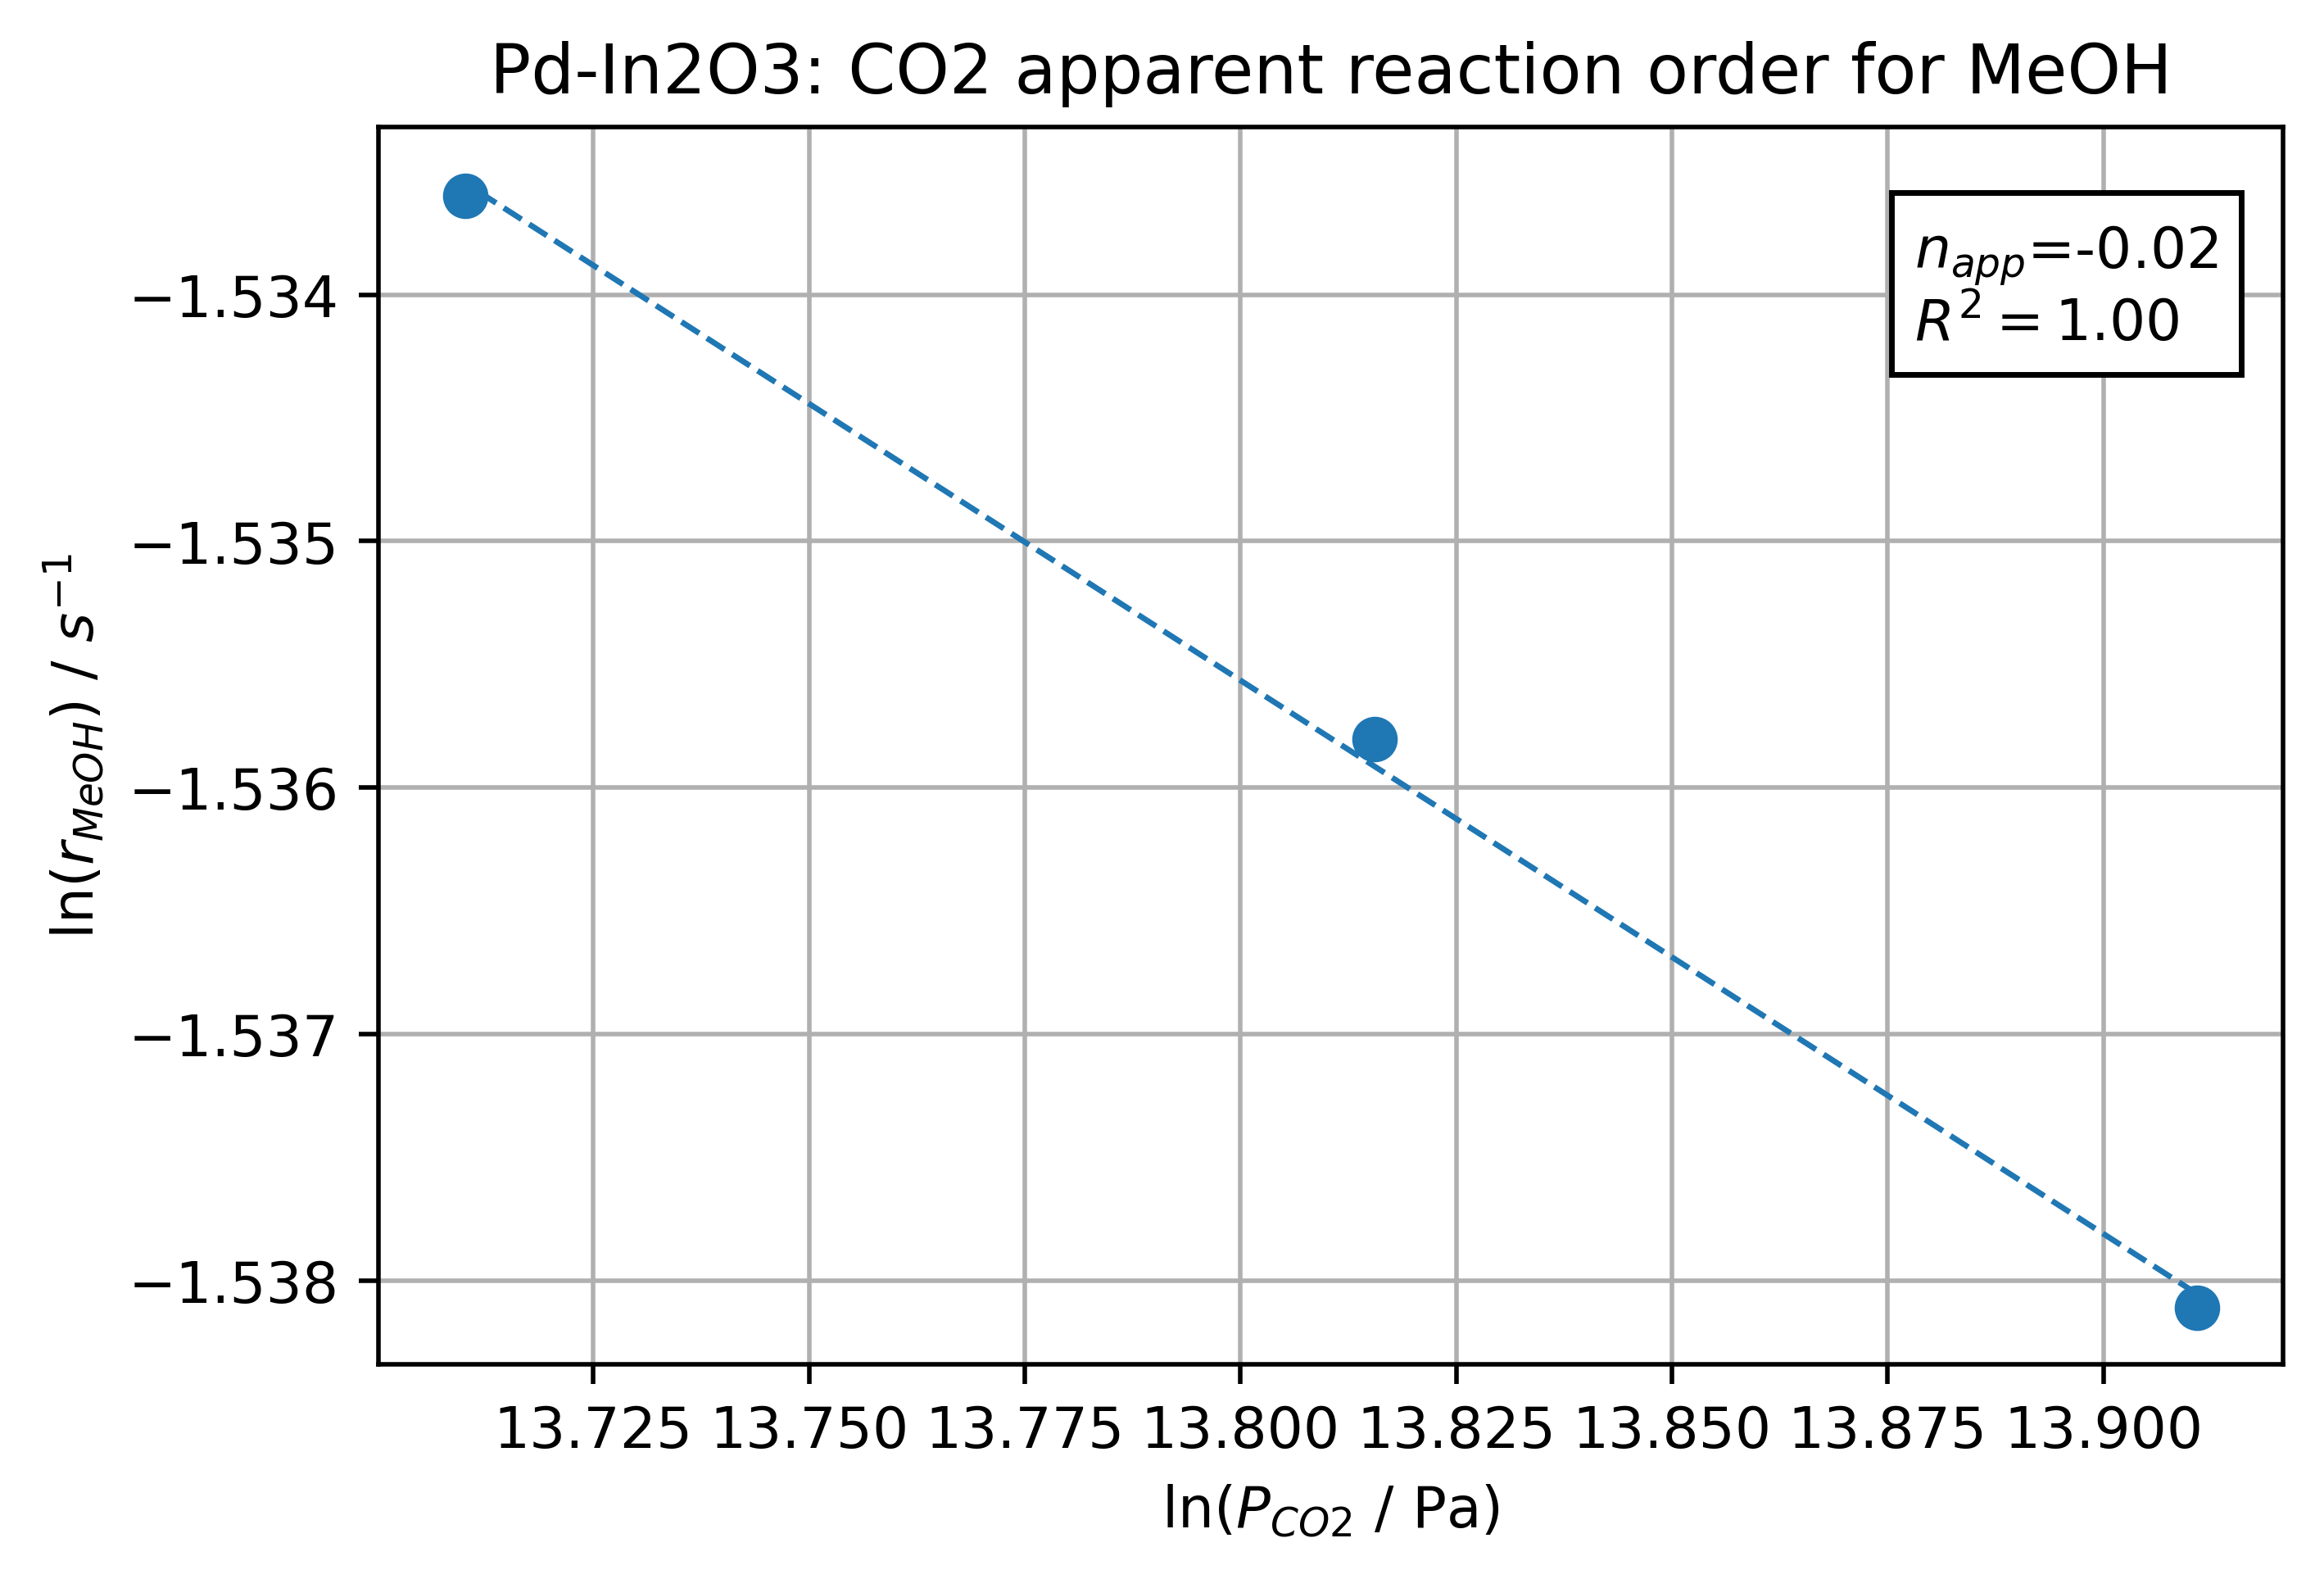

In [20]:
napp_H2 = model.calc_apparent_reaction_order(573, 5e6, composition_matrix, 'CO2', 'MeOH')

In [ ]:
napp_H2

## Descriptor search: Reversibility analysis

In [22]:
rev = model.calc_reversibility(573, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Reversibility analysis
Temperature = 573K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  


In [23]:
rev

,Reversibility [-]
R1,0.00
R2,0.00
R3,0.02
R4,1.00
R5,0.00
R6,0.88
R7,0.10
R8,1.00
R9,0.55
R10,0.19


## Rate-determining step search: Degree of rate and selectivity control

In [21]:
model.calc_drc_full(620, 5e6, [0.8,0.2,0,0,0], "MeOH")

Pd-In2O3: Full DRC and DSC analysis wrt MeOH global reaction
Temperature = 620K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

R1
DRC = 0.00

R2
DRC = 0.00

R3


KeyboardInterrupt: 

In [21]:
_

(<pandas.io.formats.style.Styler at 0x7f5681ae7070>,
 <pandas.io.formats.style.Styler at 0x7f5681ac6d30>)

# Dynamic CSTR

If someone is interested in extracting also values related to conversion and yield, the differential model is not suitable for the purpose. In order to obtain this information, a macroscopic reactor model (i.e., able to provide information about the conversion) is needed. MKM provides the dynamic CSTR model as macroscopic model. In order to use it, the reactor switch must be turned on and information about the reactor set-up must be defined.

In [33]:
model.set_reactor('dynamic')

'Reactor model: dynamic'

In [34]:
model.set_CSTR_params(radius=0.0022,
                  length=0.0022*10,
                  Q=0.66E-6,
                  S_BET=1.74E5,
                  m_cat=1.0E-4)

Reactor volume: 3.35e-07 [m3]
Inlet volumetric flowrate : 6.60e-07 [m3/s]
Residence time: 5.07e-01 [s]
Catalyst mass: 1.00e-04 [kg]
Catalyst surface: 1.74e+05 [m2/kg_cat]
Active site surface: 1.00e-19 [m2]


In [35]:
x = model.single_run(553, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Microkinetic run
Reactor model: Dynamic CSTR
Temperature = 553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 4.11e-02 1/s
MeOH Selectivity: 100.00%
Most Abundant Surface Intermediate: i21 Coverage: 74.85% 
CPU time: 3.70 s


In [27]:
x.keys()

dict_keys(['T', 'P', 'y_in', 'theta', 'ddt', 'r', 'r_MeOH', 'r_RWGS', 'S_MeOH', 'MASI', 'solver', 'y_out', 'conversion'])

In [28]:
x['MASI']

{'i21': 74.84628189452022}

In [29]:
x['r_RWGS']

1.0597246784573606e-12

In [30]:
x['r_MeOH']

1.1887920021263429e-05

In [31]:
x['conversion']

{'H2(g)': 0.062112461220757864, 'CO2(g)': 0.08281661988269073}

In [32]:
x['y_out']

{'H2(g)': 0.7760168662662614,
 'CO2(g)': 0.18972151324148837,
 'H2O(g)': 0.01713081024612505,
 'CH3OH(g)': 0.01713080871903362,
 'CO(g)': 1.5270914280228379e-09}